In [34]:
import pandas as pd
import numpy as np
# Create feature matrix with two highly correlated features
features = np.array([[1, 1, 1],
    [2, 2, 0],
    [3, 3, 1],
    [4, 4, 0],
    [5, 5, 1],
    [6, 6, 0],
    [7, 7, 1],
    [8, 7, 0],
    [9, 7, 1]])

dataframe = pd.DataFrame(features)
# Create correlation matrix
corr_matrix = dataframe.corr().abs()
print(corr_matrix)
# Select upper triangle of correlation matrix 
upper = pd.DataFrame(np.triu(corr_matrix, k=1))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features
df = dataframe.drop(dataframe.columns[to_drop], axis=1)

print(df)



          0         1         2
0  1.000000  0.976103  0.000000
1  0.976103  1.000000  0.034503
2  0.000000  0.034503  1.000000
   0  2
0  1  1
1  2  0
2  3  1
3  4  0
4  5  1
5  6  0
6  7  1
7  8  0
8  9  1


In [41]:
np.triu(corr_matrix, k=1)

array([[0.        , 0.97610336, 0.        ],
       [0.        , 0.        , 0.03450328],
       [0.        , 0.        , 0.        ]])

In [46]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2, f_classif, SelectPercentile

# Load data
iris = load_iris()
features = iris.data
target = iris.target
# Convert to categorical data by converting data to integers
features = features.astype(int)
# Select two features with highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k=2)
features_kbest = chi2_selector.fit_transform(features, target)
# Show results
print("Original number of features:", features.shape)
print("Reduced number of features:", features_kbest.shape)

Original number of features: (150, 4)
Reduced number of features: (150, 2)


In [ ]:
# Select two features with highest F-values
fvalue_selector = SelectKBest(f_classif, k=2)
features_kbest = fvalue_selector.fit_transform(features, target)

print("Original number of features:", features.shape)
print("Reduced number of features:", features_kbest.shape)

In [47]:
# Select top 75% of features with highest F-values
fvalue_selector = SelectPercentile(f_classif, percentile=75)
features_kbest = fvalue_selector.fit_transform(features, target)
# Show results
print("Original number of features:", features.shape)
print("Reduced number of features:", features_kbest.shape)

Original number of features: (150, 4)
Reduced number of features: (150, 3)


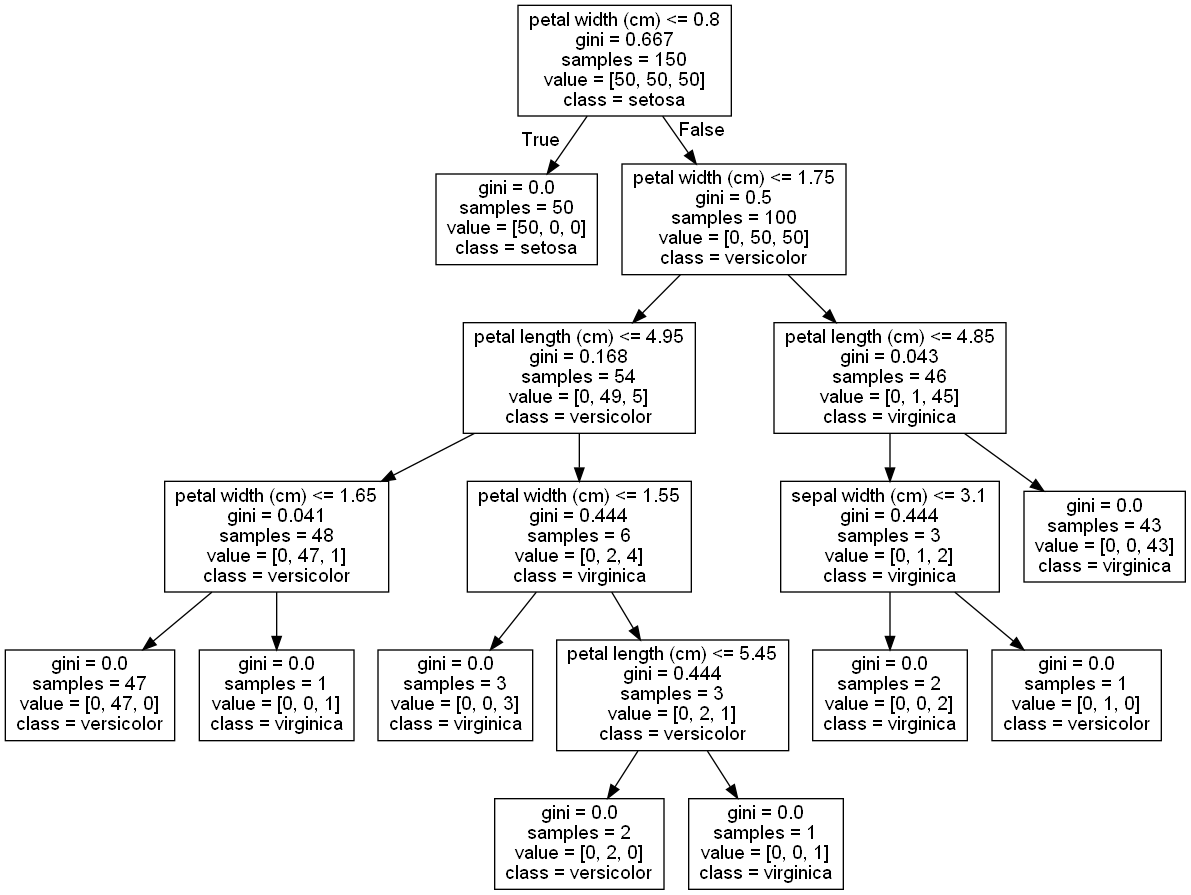

In [50]:
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image
from sklearn import tree
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create decision tree classifier object
decisiontree = DecisionTreeClassifier(random_state=0)

# Train model
model = decisiontree.fit(features, target)
# Create DOT data
dot_data = tree.export_graphviz(decisiontree, out_file=None, 
                                feature_names=iris.feature_names, class_names=iris.target_names)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png())

In [59]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target
# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)
# Train model
model = randomforest.fit(features, target)
# Calculate feature importances
importances = model.feature_importances_

print(importances)
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances

print(indices)
# name1 = iris.feature_names[indices]
names = [iris.feature_names[i] for i in indices]
# Create plot
plt.figure()
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(features.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(features.shape[1]), names, )
# Show plot
plt.show()

[0.09090795 0.02453104 0.46044474 0.42411627]


TypeError: _argsort_dispatcher() got an unexpected keyword argument 'reverse'